# Predicting Survival on Titanic

## Hemanth Babu Sana

# Summary

The goal of this study is to find the best model which predicts the survival of passengers in Titanic with high accuracy. 

The Support Vector Classifier with Radial Basis kernel yielded the best test accuracy score of 78.947% with the test dataset.

# Introduction

<figure>
<img src="RMS_Titanic_3.jpg" alt="Drawing" style="width: 600px;"/>
</figure>

(Titanic 1912)

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.(Wikipedia 2020)

We found it interesting that we could predict the survival of passengers based on their Age, Sex, Passenger Class and Embarked port. This gave use oppurtunity to try different classification algorithms and understand how they work.

We took the data from https://www.kaggle.com/c/titanic/data. 
The data has been split into two groups:
    -training set (train.csv)
    -test set (test.csv)

The training set is used to build the machine learning models. We use the trained machine learning models on the test set to predict the outcome.

# Theory and Background

The reader should have a basic understanding on how to use python libraries like pandas, sklearn and to plot using seaborn, matplotlib. 

## Methods Used

We used machine learning algorithms -Logistic Regression,Support Vector Classifier, Random Forest, K Nearest Neighbors algorithm and dimensionality reduction algorithms like Principal Component Anlaysis and Linear Discriminant Analysis.

- Logistic Regression:
It is a classification model which performs well on linearly seperable data.It is used for binary classification. Logistic regression uses Sigmoid Function to determine the probabilty of a sample belonging to certain class.It can be extended to multiclass classification, for example by using the One-vsRest (OvR) technique

- Support Vector Classifier:
The objective here is to maximise the margin. The margin is defined as the distance between the separating hyperplane
(decision boundary) and the training samples that are closest to this hyperplane.These training samples are the so-called support vectors

- Decision Tree Classifier:
It breaksdown data by making decisions based on asking series of questions. It is used if interpretability is of importance
 
- Random Forest Classifier:
This can be considered as ensemble of decision trees. It is used to build a more robust model from a  collection of decision trees that individually suffer from high variance such that the model has better generalisation performance and is less susceptible to overfitting.

- K Nearest Neighbors:
This is different from other supervised classifier as it doesnot learn a discriminative function from training data, but memorises the training data set.it finds the k samples in the training dataset that are closest(most similar) to the point taht we want to classify based on chosen distance metric.


Detailed information on the above methods with algorithms can be found here



# Data Analysis and Training Models

## Importing necessary python packages and functionalities

In [2]:
# Importing reqiured modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for converting categorical values to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8,7
plt.rcParams.update({'font.size' : 12})

## Understanding the data

###  Reading data using read_csv

In [3]:
# Reading csv files using pandas
train=pd.read_csv('train.csv')
test =pd.read_csv("test.csv")

###  Having an initial look at the data

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### We can see that there is no Survived column in test dataset. We will predict the survived in test dataset and see the accuracy of prediction.

Lets take more detailed look at the datasets

###  Exploring more details

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### From the info() function we can see that Age, Cabin, fare and embarked have null values 

### Checking Null values present in the data

#### Number of missing values per column in train and test

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the isnull() functionality we can see number of null vallues present in each column. In train data we have Age has 177 missing values, Cabin has 687 and Embarked has 2 missing values

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In test data we have 86 missing values for age, 327 for cabin and 1 missing value for Fare

####  Plotting the null values to get a better view of missing data

Text(0.5, 0.98, 'Heatmap showing null values in train dataset')

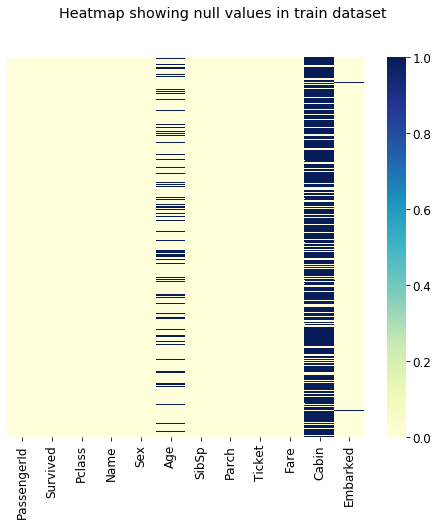

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='YlGnBu')
plt.suptitle('Heatmap showing null values in train dataset')

Text(0.5, 0.98, 'Heatmap showing null values in test dataset')

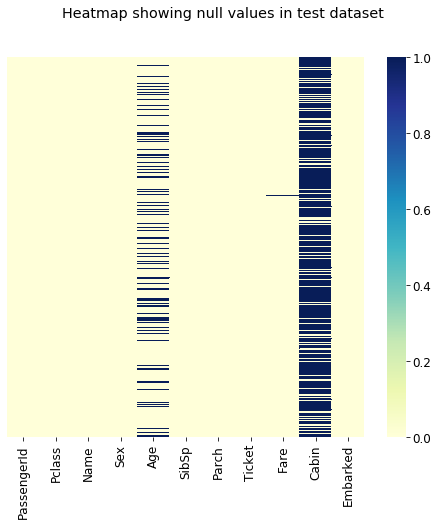

In [11]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='YlGnBu')
plt.suptitle('Heatmap showing null values in test dataset')

We can see that Cabin has a lot of missing values in both train and test datasets. It is better to drop the column Cabin

## Plotting different columns to get a better idea of the data in train

### Countplot showing number of passengers survived in train data

Text(0.5, 0.98, 'Number of passengers survived')

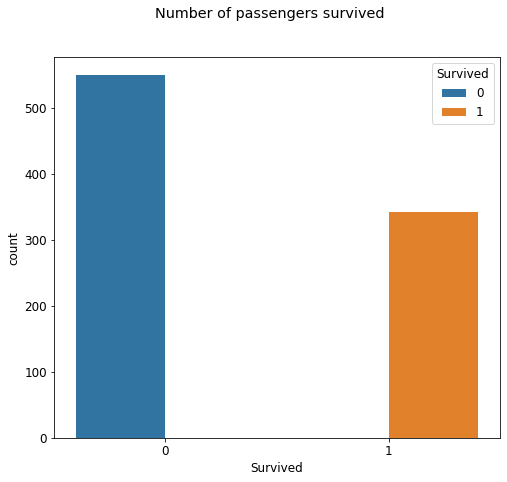

In [12]:
sns.countplot(x="Survived",hue='Survived',data=train)
plt.suptitle('Number of passengers survived')

From the above plot we get an idea of the scale of dead and survived passengers

### Countplot to show number of passengers survived for each gender

Text(0.5, 0.98, 'Number of passengers survived based on sex')

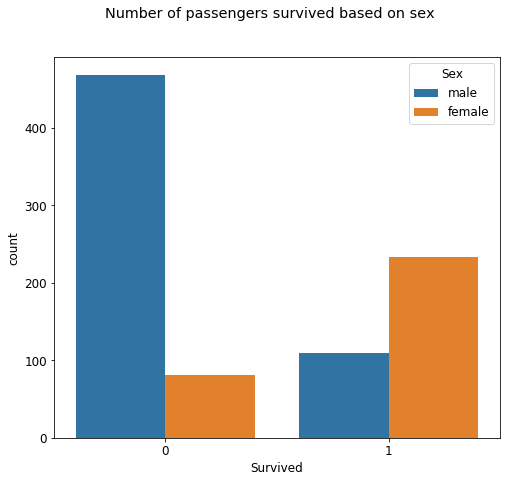

In [13]:
sns.countplot(x='Survived',hue='Sex',data=train)
plt.suptitle('Number of passengers survived based on sex')

From the above plot we can see that number of male passengers survived is far less than those who coundn't make it. Where as number of female passengers survived is more that those didnot survive.

### Countplot to show number of passengers survived based on passenger class

Text(0.5, 0.98, 'Number of passengers survived based on Passenger Class')

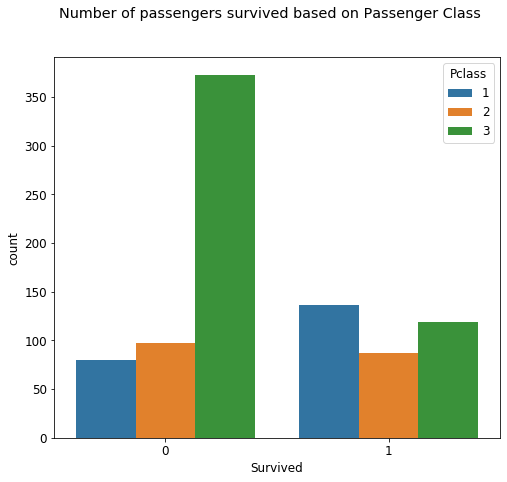

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.suptitle('Number of passengers survived based on Passenger Class')

It can be said from the plot that survival rate of passengers from class 3 is far less than the other two classes

### Plot showing number of passengers survived against the port passenger embarked/boardec

Text(0.5, 0.98, 'Number of passengers survived based on Port of Embarkation')

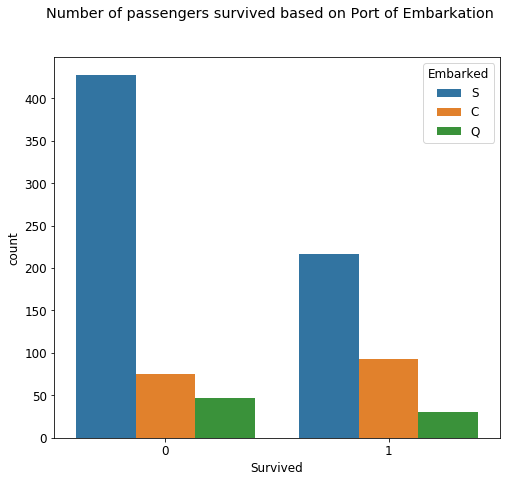

In [15]:
sns.countplot(x='Survived',hue='Embarked',data=train)
plt.suptitle('Number of passengers survived based on Port of Embarkation')

From above we can see the survived passengers for each of the three ports from which passegers embarked

From the countplots we made for survival we can observe that :
- Survival rate is more for female passengers than their male counterparts
- Passengers form Pclass 1 and 2 have high chances of survival than Pclass 3
- Passengers boarded from Cherbourg have high rates of survival

## Preparing Data

###  Dealing with missing values

We know that Age and cabin have missing values we need to deal with. Let us consider the 'Age' column and see the values distribution

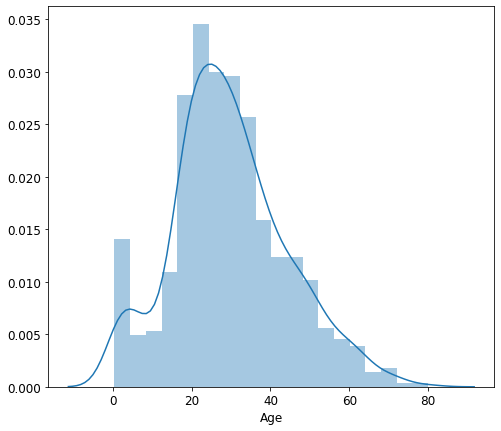

In [16]:
sns.distplot(train['Age'])

The distribution plot for Age can be seen skewed right. If we use mean it will change the distribution.So using median to fill in the null values instead of mean

To know the median for age with respect to different classes let us plot the box plot for Age vs Pclass

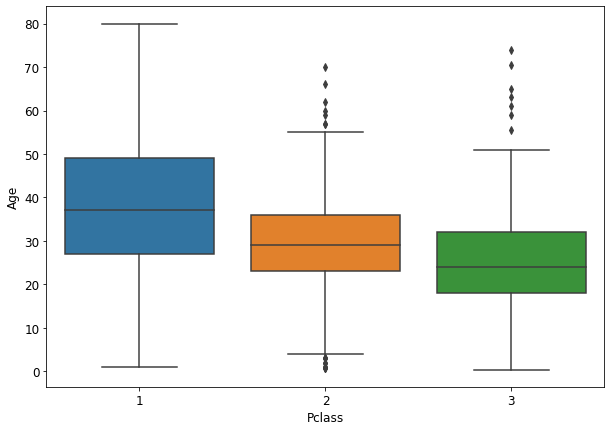

In [17]:
plt.figure(figsize=(10,7))

sns.boxplot(x="Pclass", y="Age", data=train)

It can be inferred that passengers in Pclass 1 have higher median age than those in Pclass 2. So that passengers who could afford class 1 have a higher age than the others. 

In this case it makes sense to fill the missing values in age with the median value of age with respect to passenger class.

Defining a function to replace the missing values in age with the median of ages to which class the passenger belongs

In [18]:
def get_missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [19]:
train["Age"] = train[["Age", "Pclass"]].apply(get_missing_age, axis=1)
test["Age"] = test[["Age", "Pclass"]].apply(get_missing_age, axis=1)

Filling the only missing value in Embarked with the most frequent column value that is S. And fare withe median value of the column. 

In [20]:
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)

#### There are many missing values in Cabin column so removing it

In [21]:
train.drop(labels = ["Cabin"], axis = 1, inplace = True)
test.drop(labels = ["Cabin"], axis = 1, inplace = True)

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have dealt with the missing values in the datasets

### Handling Categorical Data

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see that Sex and Embarked have Categorical data i.e, (male, female) and (S, C, Q).
Converting them to numerical data.

For converting categorical nominal data to numerical data we use OneHotEncoder(). It encodes target labels with values between 0 and (num of classes-1).

In [24]:
sex = pd.get_dummies(train["Sex"], drop_first =True)
sex_test = pd.get_dummies(test["Sex"], drop_first =True)

In [25]:
embarked = pd.get_dummies(train["Embarked"], drop_first=True)
embarked_test = pd.get_dummies(test["Embarked"], drop_first=True)

In [26]:
train = pd.concat([train,sex,embarked], axis= 1)
test = pd.concat([test,sex_test,embarked_test], axis= 1)

In [27]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [28]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

We can see that Name and Ticket are unique values and do not contribute to prediction. So removing these columns before training the model.

We converted the categorical nominal values in Sex and Embarked to numerical i.e., Sex to (male:1 or 0) and Embarked to ( Q and S)

## Splitting the train data and Standard scaling

We now split the training data to train and test splits(70-30) in order to find the best model so that we can verify the predictions which we already have and can compare the result. We use the resulting best accurate model on the main test dataset to predict the Survived outcome.

We drop the column 'Survived' for X as it is the target variable and assign it to y 

In [29]:
X = train.drop(['Survived'], axis = 1)
y = train.Survived

### Splitting the dataset 70-30 to train the data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=101, stratify=y)

If the variance of a feature is more than variance of other features, that particular feature will dominate in predicting the target. To avoid this we use StandardScaler() and transform the X_train, X_test to X_train_std, X_test_std 

In [31]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Now we need to run different models and get the accuracy score.
Insted of running the models one by one we use the concept of pipeline so that the we can get accuracy score for all the models and can be used to find the best model for this data

## Using Pipeline to find better model

We use pipeline concept to find the best model from Support Vector Classifier, SVC using kernal Principal component analysis, K-NearestNeighbors, Random Forest, Logistic Regression, Random forest using linear discriminant analysis

In [35]:
pipelines = []
n_estimators = 200
n_components = 4

pipelines.append( ('SVC',
                   Pipeline([
                             ('sc', StandardScaler()),
                             ('SVC', SVC(random_state=42, kernel ="rbf", C=1))]) ) )

from sklearn.decomposition import KernelPCA
pipelines.append( ('SVC_kpca',
                   Pipeline([
                             ('sc', StandardScaler()),
                             ('kpca', KernelPCA(n_components = n_components, random_state=42 ) ),
                             ('SVC', SVC(random_state=42, kernel ="rbf", C=1))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                            ('sc', StandardScaler()),
                            ('KNN', KNeighborsClassifier()) ])))

pipelines.append( ('RF',
                   Pipeline([
                             ('RF', RandomForestClassifier(random_state=42, n_estimators=n_estimators)) ]) ))


pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression(random_state=42, penalty ='l2')) ]) ))

pipelines.append( ('RF_lda',
                   Pipeline([
                              ('lda', LDA(n_components = 5 )), 
                             ('RF_lda', RandomForestClassifier(random_state=42, n_estimators=n_estimators)) ]) ))



results, names = [], [] 
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
   
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring = scoring,
                                n_jobs=-1) 
    
    results.append(cv_results)
    names.append(name)

    accuracy = "%s: %f (+/- %f)  " % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std())
    print(accuracy)


SVC: 82.820645 (+/- 1.694353)  
SVC_kpca: 80.423226 (+/- 2.072816)  
KNN: 80.415484 (+/- 0.859025)  
RF: 82.975484 (+/- 3.316783)  
LR: 82.185806 (+/- 2.427088)  
RF_lda: 74.307097 (+/- 3.134251)  


We can see from the above accuracy scores that top two models to use can be SVC and Random forest.

Selecting Support Vector Classifier and do the hyper parameter tuning to find the best parameters to get better accuracy.

## Hyper Parameter tuning using GridSearchCV for SVC

In [37]:
param_grid = {'C': [0.1,1, 10, 100,150,200], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,cv = 5)
grid.fit(X_train_std,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 150, 200],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


We got the best hyper parameters for SVC.

In [39]:
print(grid.best_score_)

0.8282064516129033


By using the best paramters we get a bestscore of 0.8298193548387097

Now that we found the best model for the given data. We train this model to with the whole train data set

## Training whole train dataset by using Support Vector Classifier

Using standard scaler on the whole train data and test data

In [40]:
sc = StandardScaler()
sc.fit(X)

X_std = sc.transform(X)
test_std = sc.transform(test)

We create the object of SVC with the hyperparameters we got from Gridsearch

In [41]:
svc = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Fitting the model with the best hyper paramters we got from Gridsearch CV

In [42]:
svc.fit(X_std,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predicting the survived passengers for the test data

In [43]:
y_total_pred = svc.predict(test_std)

Getting it in the format needed for kaggle

In [44]:
df_result = pd.DataFrame(y_total_pred, columns = ["Survived"], dtype=np.int64)
df_result.index.name = "PassengerId"
df_result.to_csv("predict.csv")

# Result

The below image is the screenshot of our final accuracy score after uploading the result in kaggle.

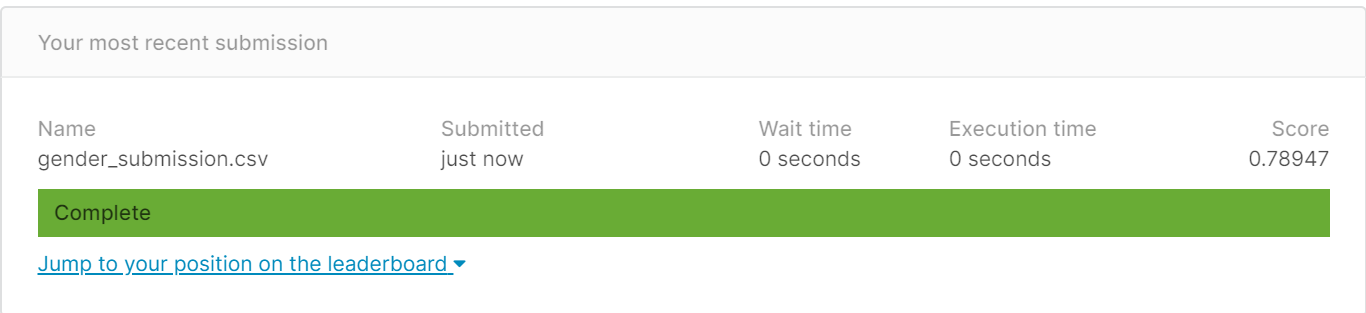

It can be seen from the result that the model with Support Vector Classifier is 78.947% accurate with the test data.

# Conclusion

It can be said that among all the models i.e., Logistic Regression,Support Vector Classifier, Random Forest, K Nearest Neighbors. Support Vector Classifier with Kernel Radial Basis Function yield the best accuracy score for  the give data. 

# References

Kaggle:Leaderboard (2020). Kaggle:Leaderboard Image. [Online; accessed August 29, 2020]. URL:https://www.kaggle.com/c/titanic/leaderboard.

Sebastian Raschka, Vahid Mirjalili (2017). Python Machine Learning. Machine Learning and Deep Learning With Python. Packt.

Titanic (1912). Titanic Image. [Online; accessed August 29, 2020]. URL: https://en.wikipedia.org/wiki/File:RMS_Titanic_3.jpg.

TitanicData (2020). Kaggle Titanic Data. URL: https://www.kaggle.com/c/titanic/data (visited on 08/29/2020).

Wikipedia (2020). Wikipedia Reference. URL: https://en.wikipedia.org/wiki/Titanic (visited on 08/29/2020).